In [1]:
import pandas as pd
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.dummy import DummyClassifier

In [2]:
with open('mapper.pkl', 'rb') as open_file:
    mapper = pkl.load(open_file)

In [3]:
with open('observations.pkl', 'rb') as open_file:
    df = pkl.load(open_file)

In [4]:
with open('LRresults.pkl', 'rb') as open_file:
    resdf = pkl.load(open_file)

In [6]:
LR_best_est = resdf['estimator'][0].best_estimator_

In [7]:
LR_best_est

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
with open('LR_best_estimator.pkl', 'wb') as open_file:
    pkl.dump(LR_best_est, open_file)

In [9]:
X = mapper.fit_transform(df)

/home/dlahtou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
y = df['funded']

In [11]:
dummy = DummyClassifier()
dummy.fit(X, y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [12]:
y_pred = LR_best_est.predict(X)
y_dummy = dummy.predict(X)

In [13]:
confusion_matrix(y, y_pred)

array([[  178,  3996],
       [  133, 18450]])

In [14]:
confusion_matrix(y, y_dummy)

array([[  756,  3418],
       [ 3411, 15172]])

In [15]:
y_proba = LR_best_est.predict_proba(X)[:,1]

In [16]:
roc_auc_score(y, y_proba)

0.7053764613369959

In [17]:
cols = mapper.transformed_names_

In [23]:
imps = LR_best_est.classes_

In [24]:
import matplotlib.pyplot as plt

In [25]:
sorted_imps = sorted(list(zip(cols, imps)), key=lambda a: a[1], reverse=True)

In [26]:
import operator

([0, 1], <a list of 2 Text xticklabel objects>)

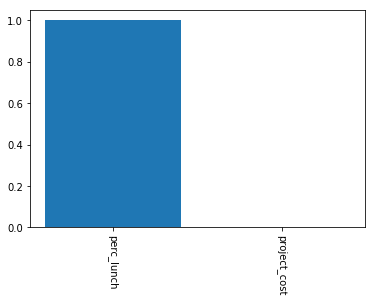

In [27]:
plt.bar([x[0] for x in sorted_imps[:15]], [x[1] for x in sorted_imps[:15]])
plt.xticks(rotation=-90)